In [1]:
%matplotlib notebook

# Analysis of Top Investment Banks

## Research Questions to Answer:

* What is the market share of each of the top investment banks in terms of revenue and assets?
* How has the revenue and profitability of the top investment banks evolved over the past five years?
* What are the key drivers of revenue and profitability for investment banks?
* What is the geographic distribution of revenue and assets for the top investment banks?
* How do the top investment banks compare in terms of risk management and governance?

In [50]:
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt

In [ ]:
#1##################################################################################################

In [ ]:
url = 'https://data.sec.gov/submissions/CIK'

In [ ]:
banks_dictionary = { 'Goldman Sachs': '0000886982','JPMorgan': '0000019617',
                    'Morgan Stanley': '0000895421','BofA Securities': '0000070858','Jeffries':'0000096223',
                    'Citi': '0000831001','Barclays': '0000312070','Credit Suisse': '0001321482',
                    'RBC': '0000050916','Deutsche Bank': '0001159508'}
print(banks_dictionary)

In [ ]:
 # Set the API base URL
url = 'https://data.sec.gov/submissions/CIK'

print("Beginning Data Retrieval     ")
print("-----------------------------")

bank_data = []

for bank in banks_dictionary:
    CIK = banks_dictionary[bank]
    query = url + CIK
    query_json = query + '.json'

    response = requests.get(query_json, headers={'user-agent':'Mozilla/5.0'})
    
    
    bank = response.json()['name']
    fiscal_year = response.json()['fiscalYearEnd']
    filings = response.json()['filings']
    
    bank_data.append({"Bank": bank, "Fiscal Year": fiscal_year})

print(bank_data)



In [ ]:

bank_df = pd.DataFrame(bank_data)
bank_df

In [ ]:
bank_df.to_csv("DATA/banks.csv", index_label="ID")

In [ ]:
bank_df = pd.read_csv("DATA/banks.csv", index_col="ID")

In [ ]:
bank_df

In [ ]:
#2##################################################################################################

In [ ]:
url = 'https://data.sec.gov/submissions/CIK'

In [ ]:
CIK = '0000886982'

In [ ]:
query = url + CIK
query_json = query + '.json'
print(query_json)

In [ ]:
response = requests.get(query_json, headers={'user-agent':'Mozilla/5.0'})
json_response = response.json()

In [ ]:
print(json_response)

In [ ]:
with open('./test_json.json', 'w') as test_file:
    json.dump(json_response, test_file, indent=4, sort_keys=True)
 

In [ ]:
print(json_response.keys())

In [ ]:
#some of Adam's notes:

#pd.DataFrame([{'name':'doc1','a':'1'},{'name':'doc2','b':'2'},{'name':'doc3','a':'3'},])

# Script1: Loop through list of companies, call API, save data
#### OPTIONAL get other data with other scripts
# Script 2: Load data into data frame and clean
# Script3: Perform data  analysis

In [ ]:
#3###############################################################################################
# run top cells then start from here 

In [150]:
bank_data_to_load = "DATA/investment_banking.csv"

bank_data_df = pd.read_csv(bank_data_to_load)


bank_data_df.head()

,Bank,Fiscal Year,Total IB fees,Market Share %,Net Interest Income,Non interest income,Total Revenue,Total non-interest expense,Net Income,Total Assets,Total Liabilities,IB fees as a % of net revenue,IB fees as a % of non-interest income,Unnamed: 13
0,Jefferies Financial Group Inc.,2021,"$4,365,699.00",NaN,"$88,782.00","$8,096,547.00","$8,185,329.00","$5,759,721.00","$1,677,376.00","$60,404,110.00","$49,674,070.00",$0.53,$0.54,NaN
1,Jefferies Financial Group Inc.,2020,"$2,501,494.00",NaN,"$997,555.00","$5,013,319.00","$6,010,874.00","$4,783,438.00","$768,410.00","$53,118,352.00","$43,530,151.00",$0.42,$0.50,NaN
2,Jefferies Financial Group Inc.,2019,"$1,526,992.00",NaN,"$1,603,940.00","$2,289,036.00","$3,892,976.00","$3,530,186.00","$962,563.00","$49,460,234.00","$39,706,945.00",$0.39,$0.67,NaN
3,Jefferies Financial Group Inc.,2018,"$1,904,870.00",NaN,"$1,294,325.00","$2,469,709.00","$3,764,034.00","$3,435,708.00","$277,092.00","$47,131,095.00","$36,907,059.00",$0.51,$0.77,NaN
4,Jefferies Financial Group Inc.,2017,"$1,764,285.00",NaN,"$993,198.00","$3,084,247.00","$4,077,445.00","$3,294,840.00","$(35,784.00)","$47,169,108.00","$36,478,536.00",$0.43,$0.57,NaN


In [151]:
bank_data_df["Total IB fees"].dtypes

dtype('O')

In [152]:
#To Do: Excel file numbers all measured in millions
# $ taken out in Excel  
# 

bank_data_df["Total IB fees"] = bank_data_df["Total IB fees"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Total IB fees"] = bank_data_df["Total IB fees"].map(lambda x: x.lstrip("$"))
bank_data_df["Total IB fees"] = pd.to_numeric(bank_data_df["Total IB fees"])

bank_data_df["Net Interest Income"] = bank_data_df["Net Interest Income"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Net Interest Income"] = bank_data_df["Net Interest Income"].map(lambda x: x.lstrip("$"))
bank_data_df["Net Interest Income"] = pd.to_numeric(bank_data_df["Net Interest Income"])

bank_data_df["Non interest income"] = bank_data_df["Non interest income"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Non interest income"] = bank_data_df["Non interest income"].map(lambda x: x.lstrip("$"))
bank_data_df["Non interest income"] = pd.to_numeric(bank_data_df["Non interest income"])

bank_data_df["Total Revenue"] = bank_data_df["Total Revenue"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Total Revenue"] = bank_data_df["Total Revenue"].map(lambda x: x.lstrip("$"))
bank_data_df["Total Revenue"] = pd.to_numeric(bank_data_df["Total Revenue"])

bank_data_df["Total non-interest expense"] = bank_data_df["Total non-interest expense"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Total non-interest expense"] = bank_data_df["Total non-interest expense"].map(lambda x: x.lstrip("$"))
bank_data_df["Total non-interest expense"] = pd.to_numeric(bank_data_df["Total non-interest expense"])

bank_data_df["Net Income"] = bank_data_df["Net Income"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Net Income"] = bank_data_df["Net Income"].map(lambda x: x.lstrip("$"))
bank_data_df["Net Income"] = pd.to_numeric(bank_data_df["Net Income"])


bank_data_df["Total Assets"] = bank_data_df["Total Assets"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Total Assets"] = bank_data_df["Total Assets"].map(lambda x: x.lstrip("$"))
bank_data_df["Total Assets"] = pd.to_numeric(bank_data_df["Total Assets"])

bank_data_df["Total Liabilities"] = bank_data_df["Total Liabilities"].astype(str).str.replace("\D+","",regex=True)
bank_data_df["Total Liabilities"] = bank_data_df["Total Liabilities"].map(lambda x: x.lstrip("$"))
bank_data_df["Total Liabilities"] = pd.to_numeric(bank_data_df["Total Liabilities"])

#seems to work now but keep this for a while
#bank_data_df['Fiscal Year'] = bank_data_df['Fiscal Year'].astype('int64')

bank_data_df

,Bank,Fiscal Year,Total IB fees,Market Share %,Net Interest Income,Non interest income,Total Revenue,Total non-interest expense,Net Income,Total Assets,Total Liabilities,IB fees as a % of net revenue,IB fees as a % of non-interest income,Unnamed: 13
0,Jefferies Financial Group Inc.,2021,4.365699e+08,NaN,8.878200e+06,8.096547e+08,818532900,575972100,1.677376e+08,6040411000,4967407000,$0.53,$0.54,NaN
1,Jefferies Financial Group Inc.,2020,2.501494e+08,NaN,9.975550e+07,5.013319e+08,601087400,478343800,7.684100e+07,5311835200,4353015100,$0.42,$0.50,NaN
2,Jefferies Financial Group Inc.,2019,1.526992e+08,NaN,1.603940e+08,2.289036e+08,389297600,353018600,9.625630e+07,4946023400,3970694500,$0.39,$0.67,NaN
3,Jefferies Financial Group Inc.,2018,1.904870e+08,NaN,1.294325e+08,2.469709e+08,376403400,343570800,2.770920e+07,4713109500,3690705900,$0.51,$0.77,NaN
4,Jefferies Financial Group Inc.,2017,1.764285e+08,NaN,9.931980e+07,3.084247e+08,407744500,329484000,3.578400e+06,4716910800,3647853600,$0.43,$0.57,NaN
5,CREDIT SUISSE,2021,1.444006e+09,NaN,6.373807e+08,1.852035e+09,2489415400,2094000200,1.783481e+08,82903696400,78052319800,$0.58,$0.78,NaN
6,CREDIT SUISSE,2020,1.331648e+09,NaN,6.682395e+08,1.847096e+09,2515335400,2002696300,2.995169e+08,92008201300,87183911900,$0.53,$0.72,NaN
7,CREDIT SUISSE,2019,1.147588e+09,NaN,7.216908e+08,1.590764e+09,2312455000,1793685100,3.522575e+08,80972436500,76476499000,$0.50,$0.72,NaN
8,CREDIT SUISSE,2018,1.205271e+09,NaN,7.104916e+08,1.410137e+09,2120628500,1753978700,2.038520e+08,77943841900,72489600000,$0.57,$0.85,NaN
9,CREDIT SUISSE,2017,1.212871e+09,NaN,6.729960e+08,1.472134e+09,2145129800,1939546300,1.008929e+08,81729344100,77399158400,$0.57,$0.82,NaN


In [154]:


jeff_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies Financial Group Inc.',['Total IB fees']]
jeff_plot_df = jeff_plot_df.iloc[::-1]

suisse_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'CREDIT SUISSE',['Total IB fees']]
suisse_plot_df = suisse_plot_df.iloc[::-1]

citi_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['Total IB fees']]
citi_plot_df = citi_plot_df.iloc[::-1]

bar_plot_df = bank_data_df.loc[bank_data_df['Bank'] == "Barclay's",['Total IB fees']]
bar_plot_df = bar_plot_df.iloc[::-1]

gs_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'GS',['Total IB fees']]
gs_plot_df = gs_plot_df.iloc[::-1]

jp_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'JPM',['Total IB fees']]
jp_plot_df = jp_plot_df.iloc[::-1]

rbc_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['Total IB fees']]
rbc_plot_df = rbc_plot_df.iloc[::-1]

deutsche_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['Total IB fees']]
deutsche_plot_df = deutsche_plot_df.iloc[::-1]

bac_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'BANK OF AMERICA NA',['Total IB fees']]
bac_plot_df = bac_plot_df.iloc[::-1]

ms_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['Total IB fees']]
ms_plot_df = ms_plot_df.iloc[::-1]

<IPython.core.display.Javascript object>


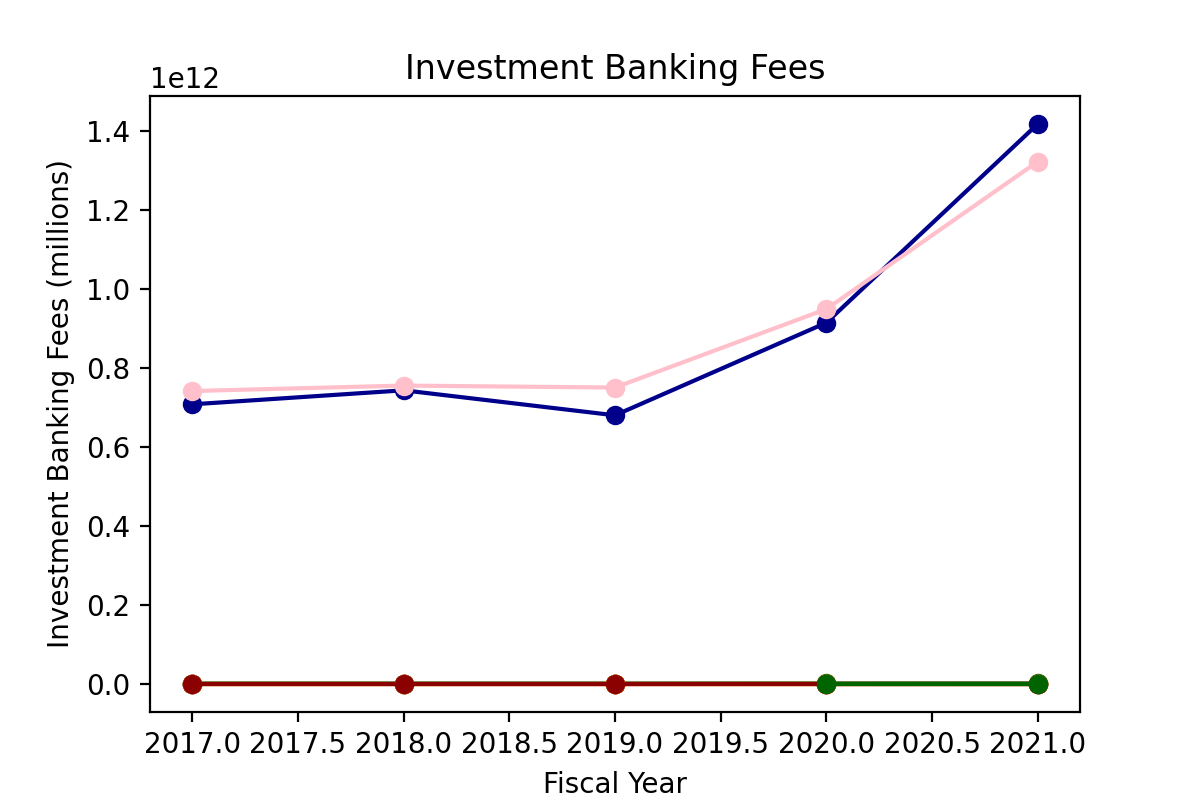

In [157]:
x_axis = np.sort(bank_data_df['Fiscal Year'].unique(), axis=-1)

x_tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))


jeff, = plt.plot(x_axis, jeff_plot_df['Total IB fees'], marker ='o', color='blue', label="Jefferies")
suisse, = plt.plot(x_axis, suisse_plot_df['Total IB fees'], marker ='o', color='green', label="CS")
citi, = plt.plot(x_axis, citi_plot_df['Total IB fees'], marker ='o', color='red', label="CitiBank")
bar, = plt.plot(x_axis, bar_plot_df['Total IB fees'], marker ='o', color='purple', label="Barclay's")
gs, = plt.plot(x_axis, gs_plot_df['Total IB fees'], marker ='o', color='darkblue', label="Goldman Sachs")
jp, = plt.plot(x_axis, jp_plot_df['Total IB fees'], marker ='o', color='pink', label="JP Morgan")
rbc, = plt.plot(x_axis, rbc_plot_df['Total IB fees'], marker ='o', color='yellow', label="Royal Bank of Canada")
d, = plt.plot(x_axis, deutsche_plot_df['Total IB fees'], marker='o', color='orange', label="Deutsche Bank")
bac, = plt.plot(x_axis, bac_plot_df['Total IB fees'], marker='o', color='darkred', label="Morgan Stanley")
ms, = plt.plot(x_axis, ms_plot_df['Total IB fees'], marker='o', color='darkgreen', label="Morgan Stanley")
#plt.xticks(x_tick_locations,1)
plt.title("Investment Banking Fees")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees (millions)")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'
banking_groups = bank_data_df.groupby(['Bank','Fiscal Year'])

# Create a new variable that holds the sum of our groups
new_banking_groups = banking_groups[['Total IB fees']]
new_banking_groups